## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import missingno as msno

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


## Load the Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

## Exploratory Data Analysis

### Descriptive Analysis

In [ ]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [ ]:
df.shape

(23097, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

**Observations:**

1. The shape of the dataset is (23097, 18)
2. The dataset has a memory usage of 3.2 MB
3. The dataset have float, int and object columns.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_Patient_Care_Situation,23097.0,16545.712041,9532.263503,2.0000,8280.00000,16597.000000,24825.000000,33014.000000
Diagnosed_Condition,23097.0,26.413127,15.030865,0.0000,13.00000,26.000000,39.000000,52.000000
Patient_ID,23097.0,6261.280772,3595.990620,1.0000,3181.00000,6242.000000,9363.000000,12515.000000
Patient_Age,23097.0,33.209768,19.549882,0.0000,16.00000,33.000000,50.000000,149.000000
Patient_Body_Mass_Index,23097.0,23.454820,3.807661,1.0893,20.20555,23.386199,26.788154,29.999579
A,21862.0,0.897905,0.302780,0.0000,1.00000,1.000000,1.000000,1.000000
B,21862.0,0.136355,0.343173,0.0000,0.00000,0.000000,0.000000,1.000000
C,21862.0,0.185070,0.388363,0.0000,0.00000,0.000000,0.000000,1.000000
D,21862.0,0.083615,0.276817,0.0000,0.00000,0.000000,0.000000,1.000000
E,21862.0,0.393239,0.488480,0.0000,0.00000,0.000000,1.000000,1.000000


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
Treated_with_drugs,23084,32,DX6,8606
Patient_Smoker,23097,3,NO,13246
Patient_Rural_Urban,23097,2,RURAL,16134
Patient_mental_condition,23097,1,Stable,23097


In [ ]:
df.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
df['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

### Data Visualization

#### Univariate Analysis

In [ ]:
plt.rcParams["figure.figsize"] = [14, 9]
plt.rcParams["figure.autolayout"] = True

**Target Variable**

In [ ]:
values = np.array([len(df[df['Survived_1_year']==0]), len(df[df['Survived_1_year']==1])])
labels = ['Patient did not survived', 'Patient got survived']
fig = plotly.graph_objects.Figure(data = [plotly.graph_objects.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Survival of a patient after 1 year of treatment"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

**Feature Variables**

In [ ]:
col = df.columns

In [ ]:
object_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes(['int64','float64']).columns
object_df = df[object_columns]
numerical_df = df[numerical_columns]

In [ ]:
discrete_columns = [col for col in numerical_columns if df[col].nunique()<60]
discrete_df = df[discrete_columns]
discrete_df.head()

,Diagnosed_Condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,51,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [ ]:
categorical_df = pd.concat([object_df,discrete_df],axis=1)
categorical_df.drop(columns='Survived_1_year',inplace=True)
categorical_df.head()

,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,Diagnosed_Condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,DX6,YES,URBAN,Stable,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,DX2,YES,RURAL,Stable,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,DX6,YES,RURAL,Stable,23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,DX1,NO,URBAN,Stable,51,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,NaN,Cannot say,RURAL,Stable,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
continuous_columns = [col for col in numerical_columns if col not in discrete_columns]
continuous_df = df[continuous_columns]
continuous_df.head()

,ID_Patient_Care_Situation,Patient_ID,Patient_Age,Patient_Body_Mass_Index
0,22374,3333,56,18.479385
1,18164,5740,36,22.945566
2,6283,10446,48,27.510027
3,5339,12011,5,19.130976
4,33012,12513,128,1.348400


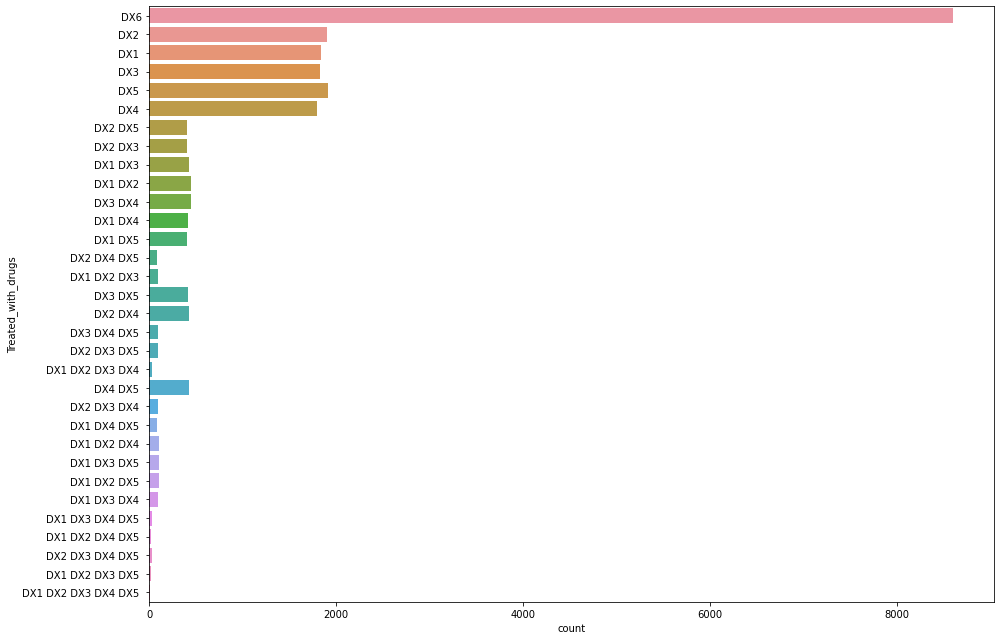

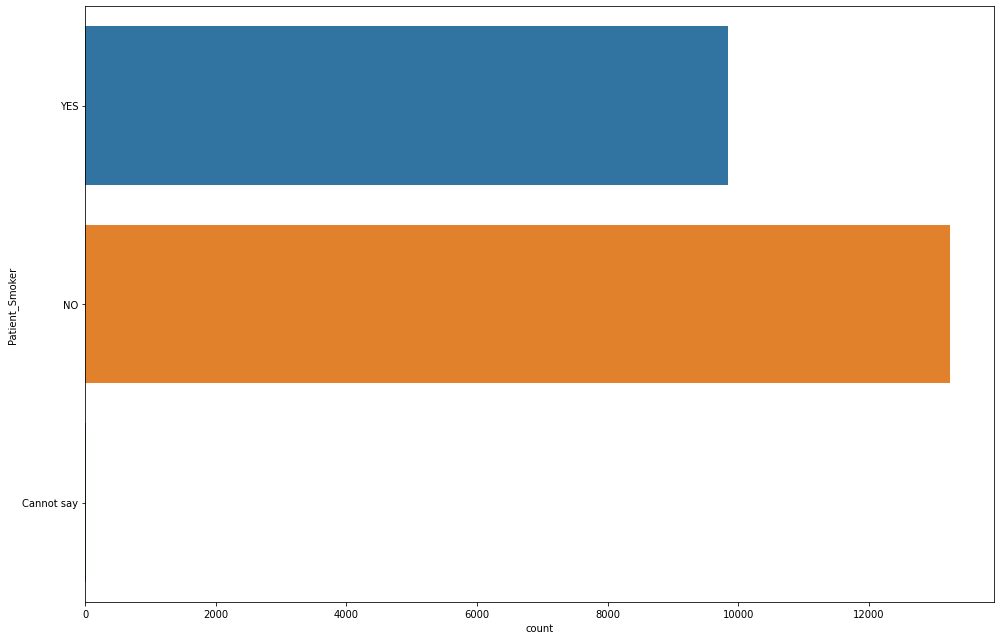

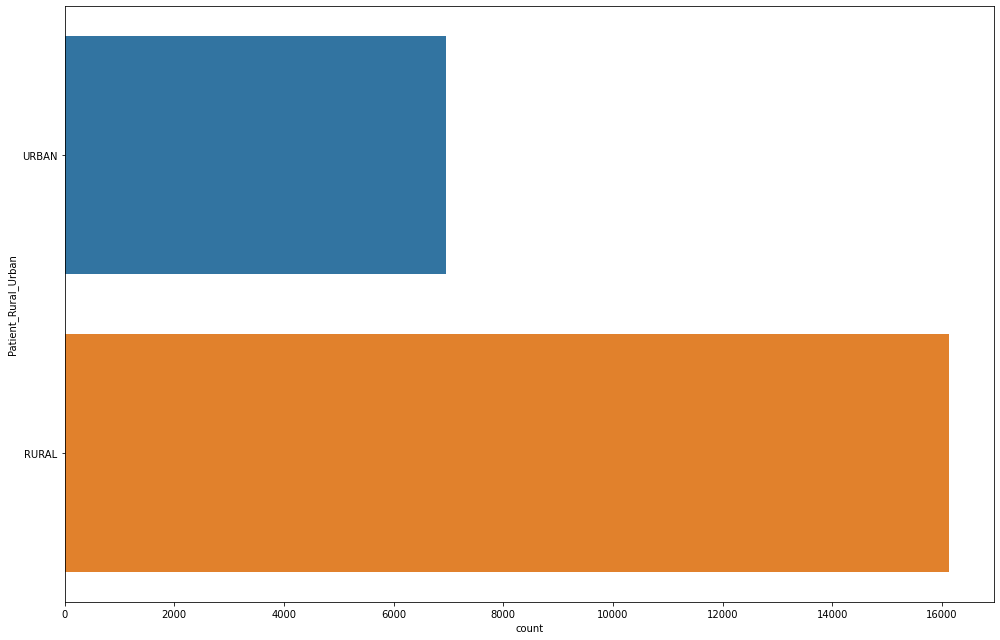

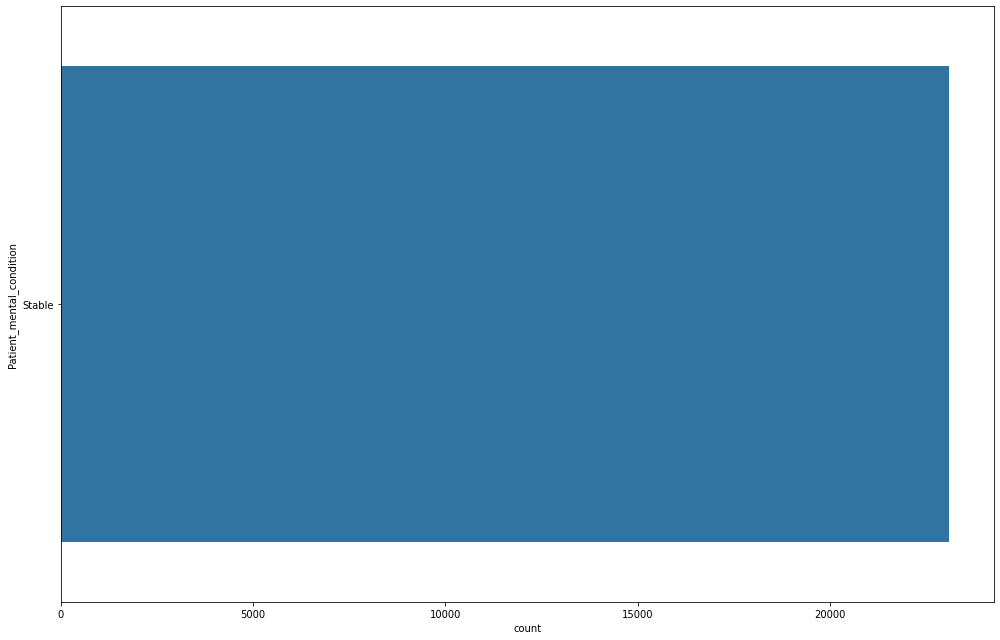

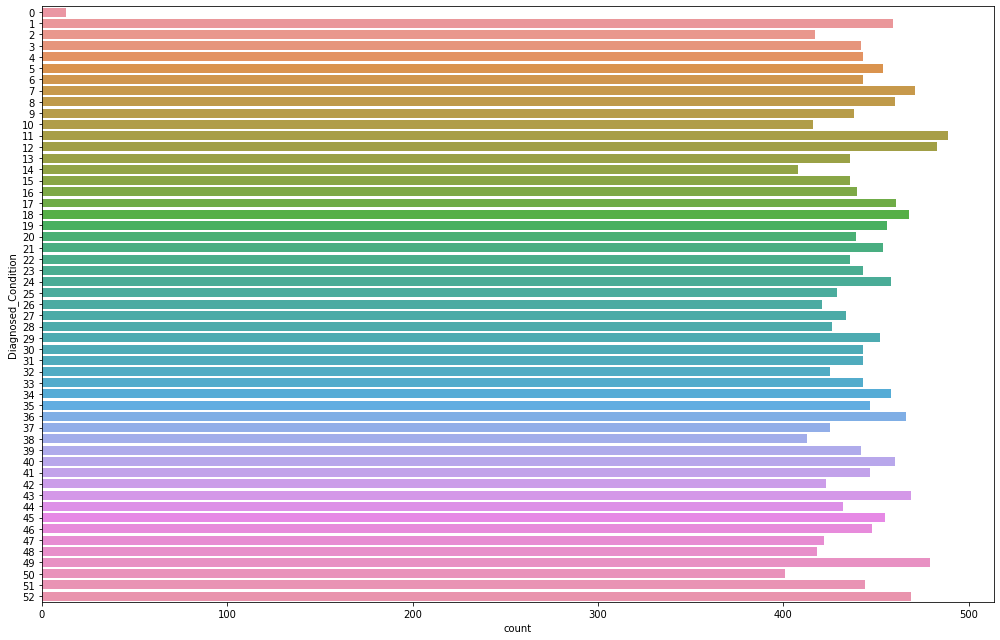

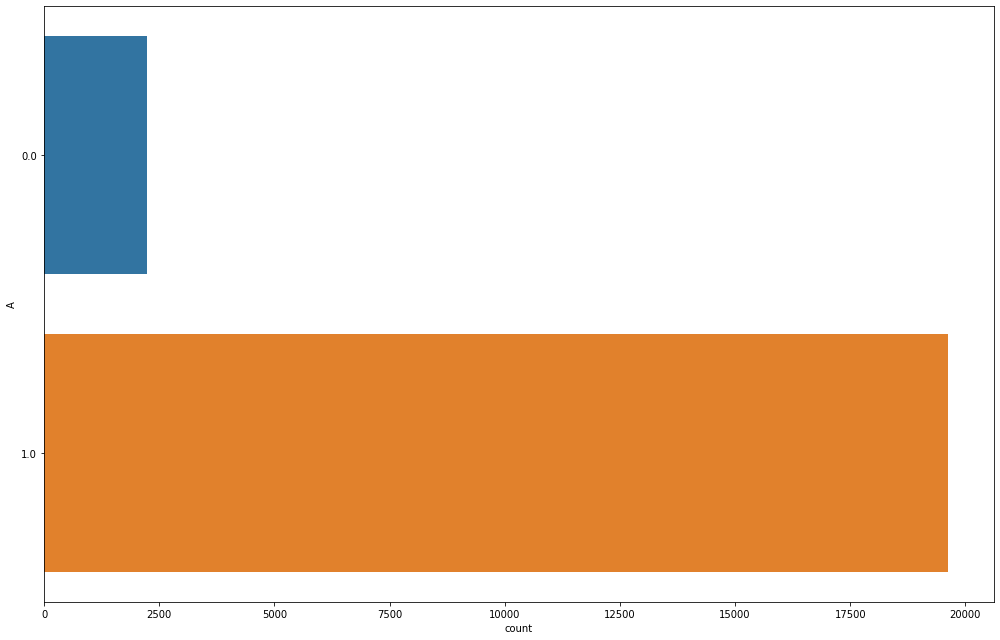

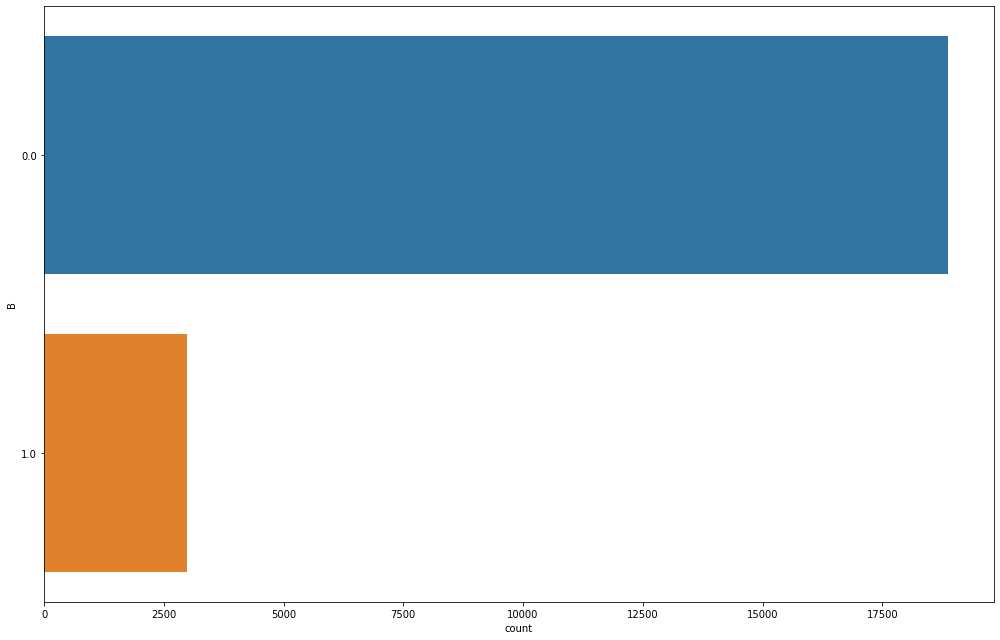

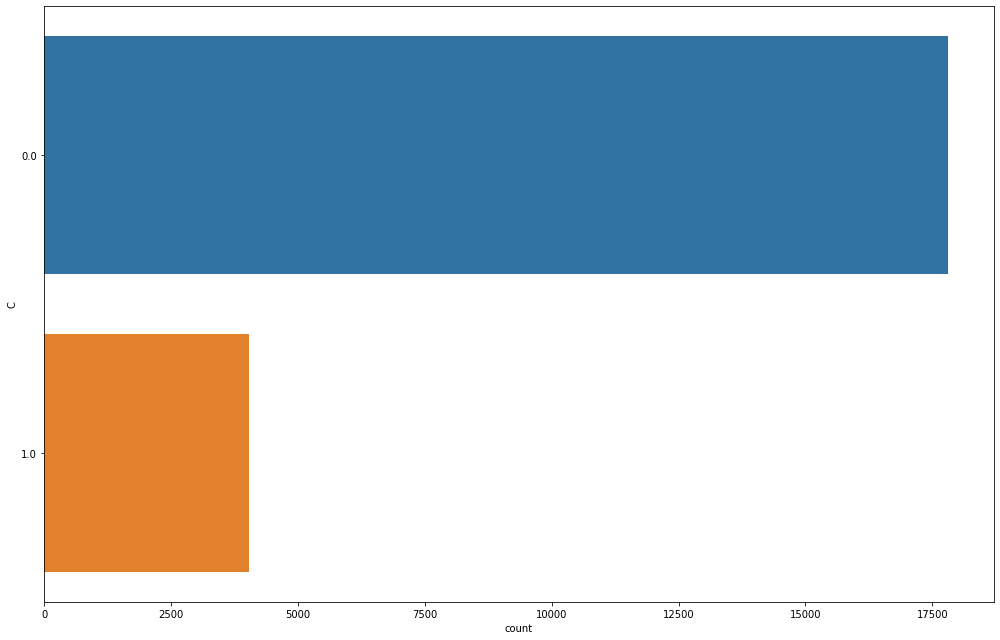

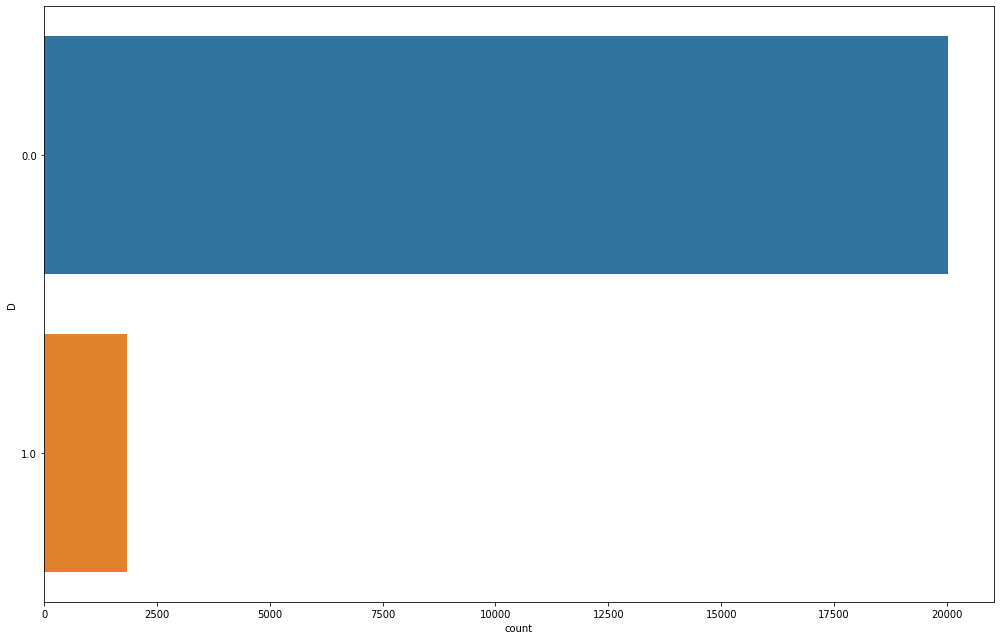

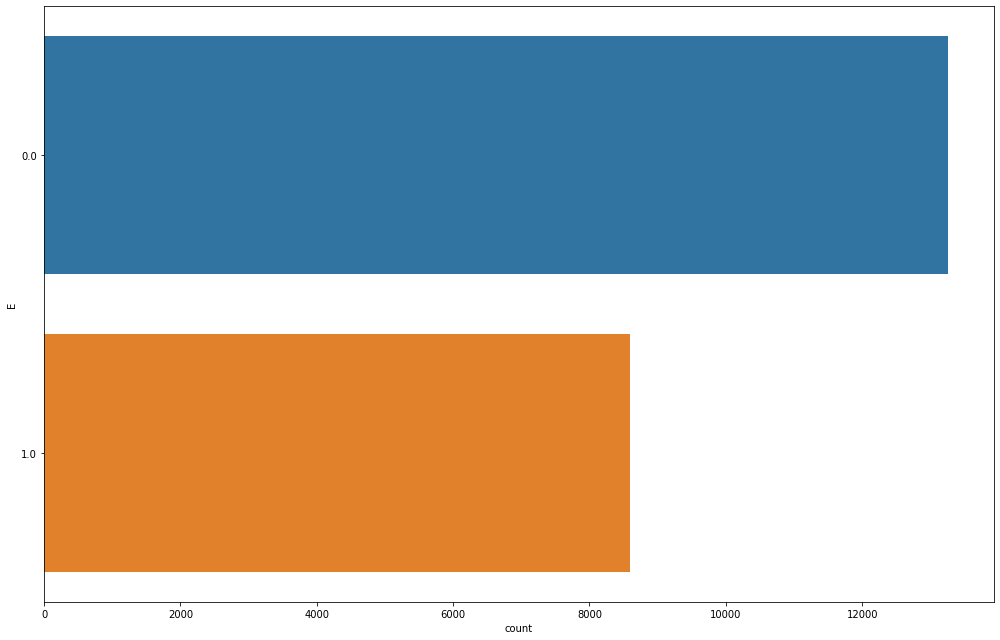

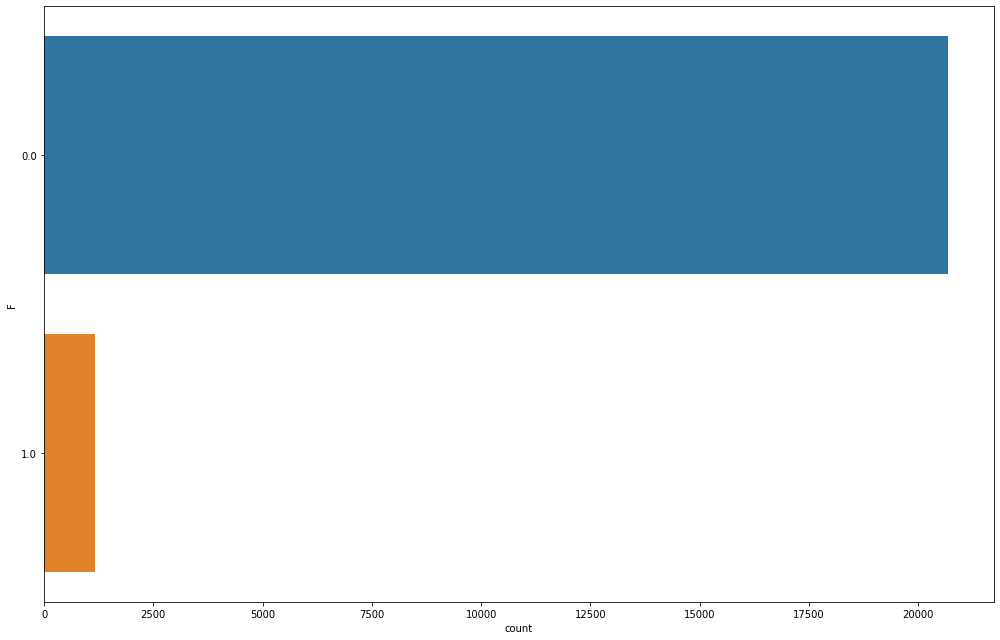

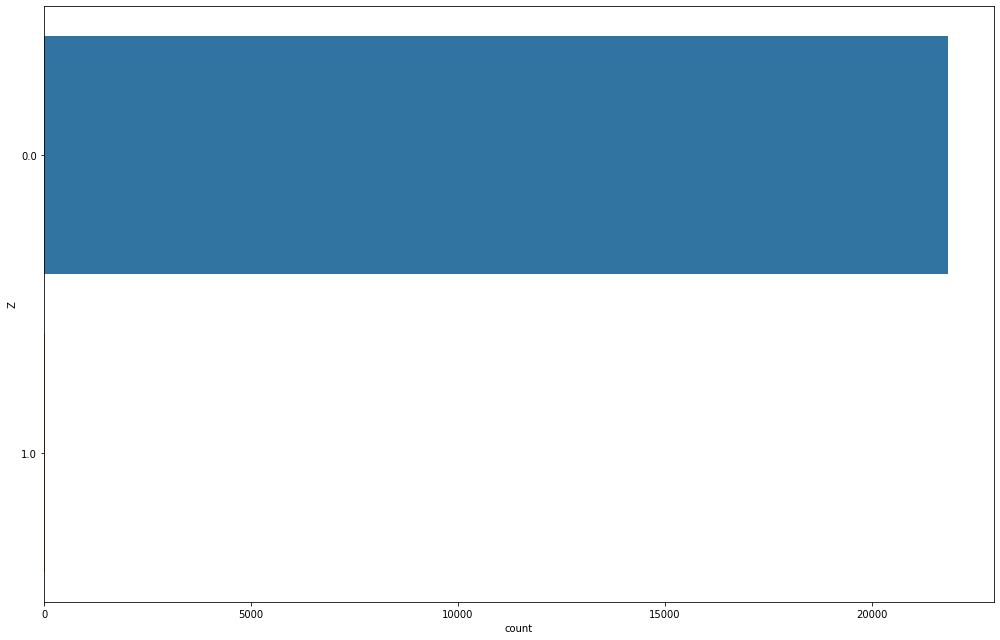

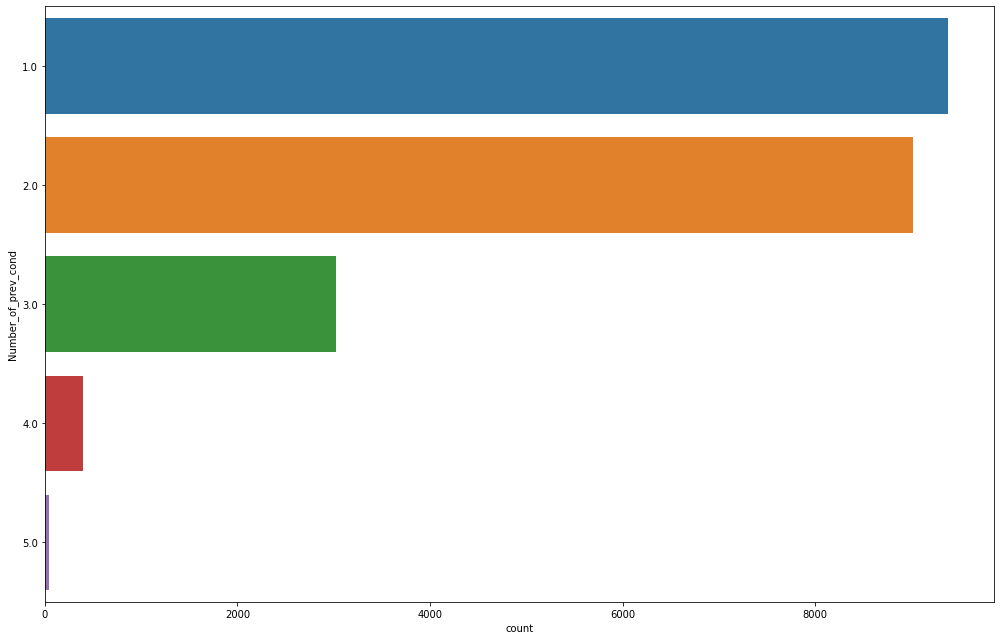

In [ ]:
#Categorical Variables
for col in categorical_df:
    sns.countplot(y=col, data=categorical_df)
    plt.show()

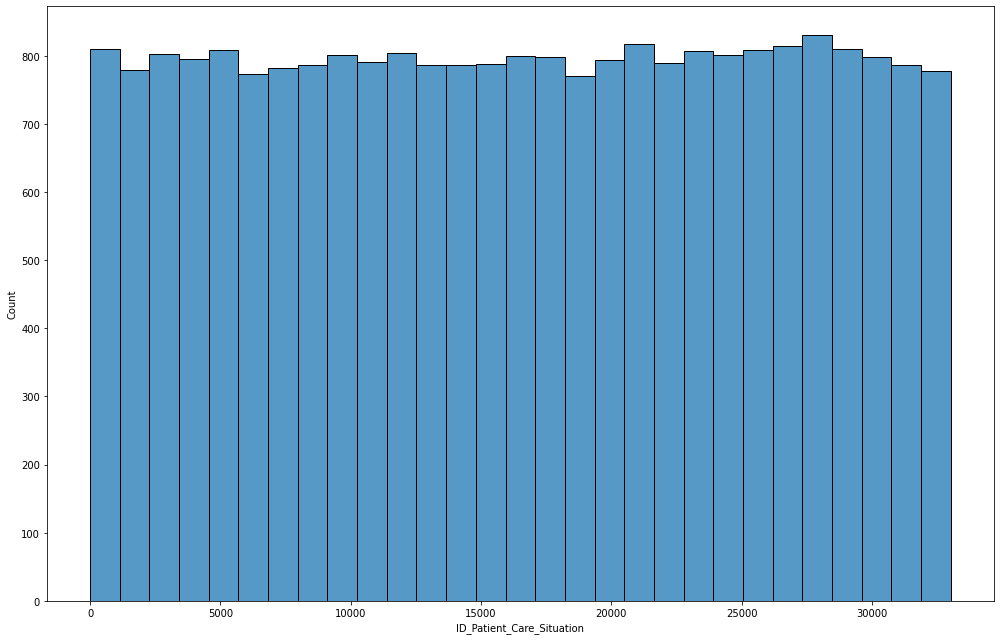

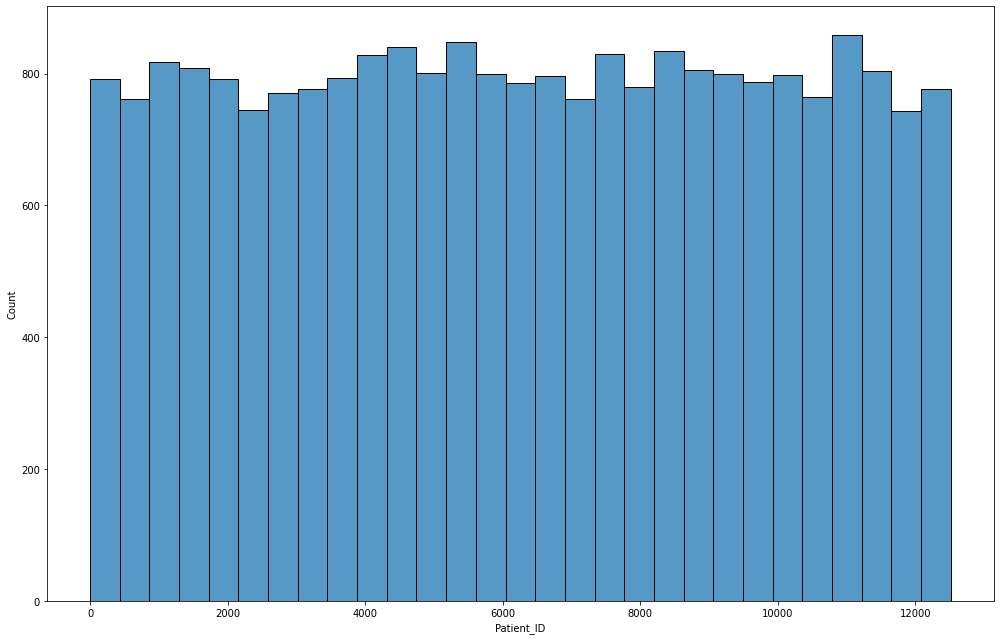

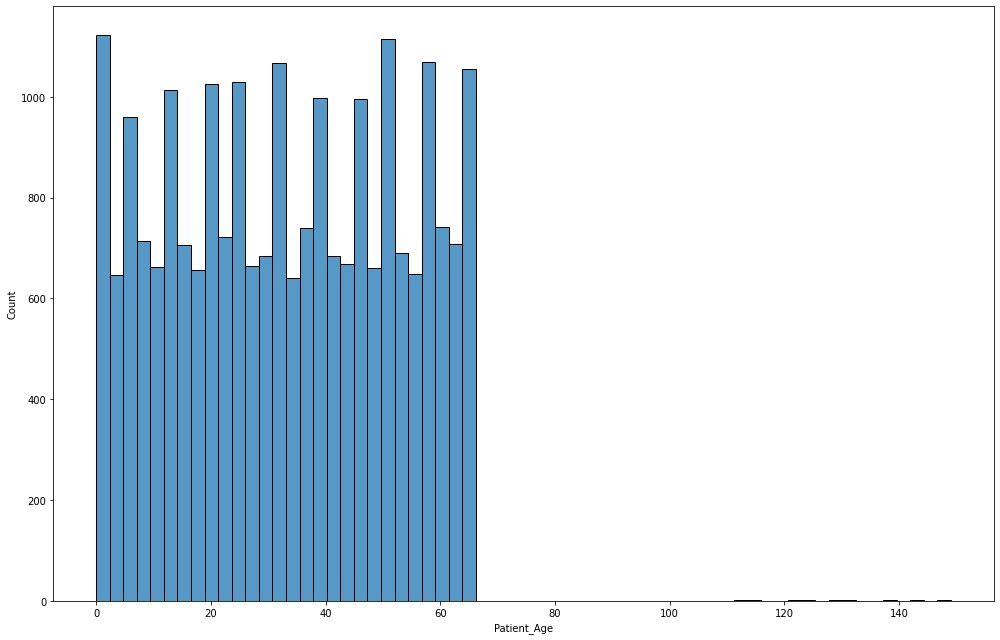

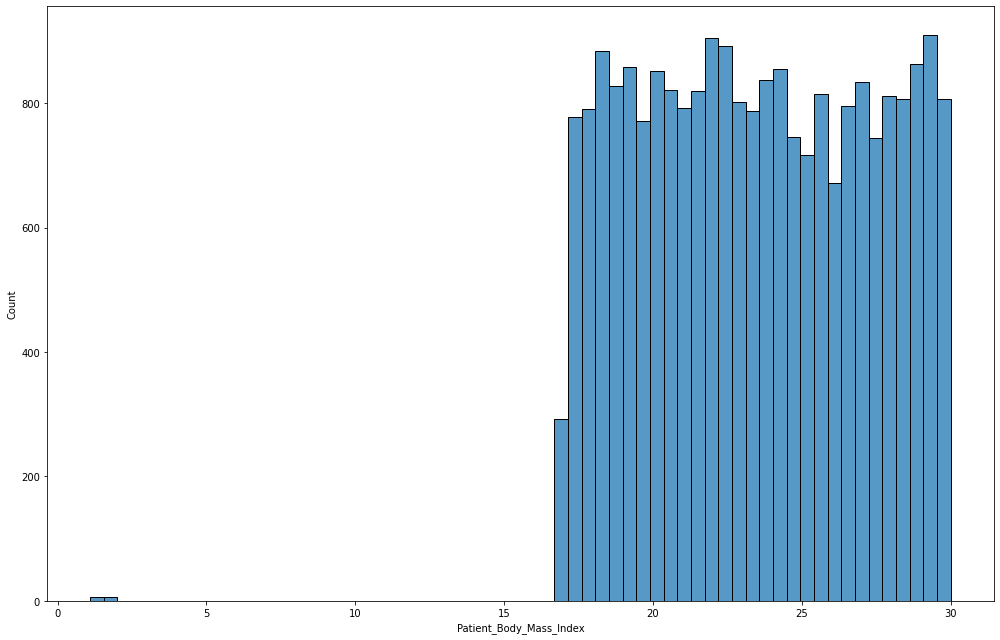

In [ ]:
#Continuous Variables
for col in continuous_df:
    #sns.histplot(x=col, data=continuous_df)
    sns.histplot(continuous_df[col])
    plt.show()

#### Multivariate Analysis

In [ ]:
df.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [ ]:
df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [ ]:
fig = px.box(df, y="Patient_Age", color="Survived_1_year")
text_title = "Age and Patient Survival Condition"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

In [ ]:
fig = px.box(df, y="Patient_Body_Mass_Index", color="Survived_1_year")
text_title = "BMI and Patient Survival Condition"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

In [ ]:
fig = px.histogram(df, x="Patient_Smoker", color="Survived_1_year").update_xaxes(categoryorder='total descending')
text_title = "Patient Smoking Status and Survival Condition"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

In [ ]:
fig = px.violin(df, x='Patient_Smoker', y='Patient_Age',color='Survived_1_year')
text_title = "Patient Smoking Status, Age and Survival Condition"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

In [ ]:
fig = px.histogram(df, y='Treated_with_drugs', color='Survived_1_year')
text_title = "Number of Previous Condition and Survival Condition"
fig.update_layout(height = 500, width = 1000, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

In [ ]:
fig = px.strip(df, x='Number_of_prev_cond', y='Patient_Age', color='Survived_1_year')
text_title = "Number of Previous Condition and Survival Condition"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

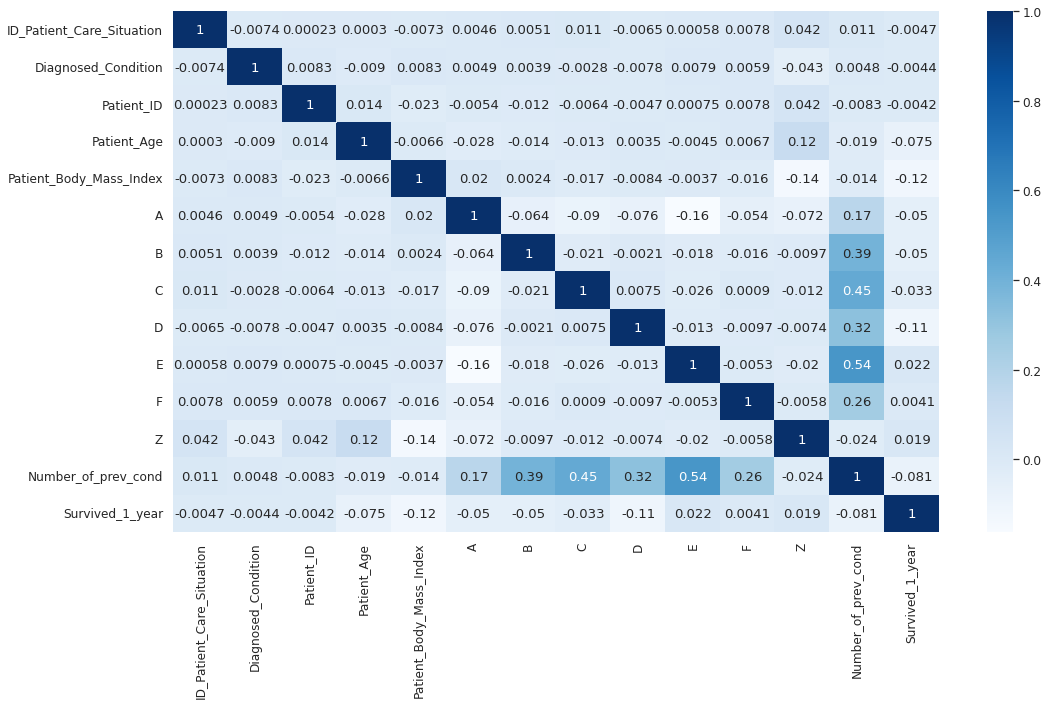

In [ ]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.1)
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

**Observations:**

1. Missing values are present at the columns Treated_with_drugs, A,B,C,D,E,F,Z and Number_of_prev_cond
2. The most common diagnose condition of the patient is 26.
3. The minimum, average and maximum age of the patient are 0, 33 and 149, respectively. It seems that the maximum age is very large as compared with the life span rate in Greenland.
4. The minimum, average and maximum body mass index of the patient are 1.0893, 23.386199 and 29.999579, respectively. It seems that the minimum bmi is very low as compared with the lowest bmi ever recorded.
5. DX6 is the most frequent drugs being treated by the patient. DX6 drug is used for the treatment of various diseases and conditions such as inflammatory conditions, autoimmune conditions, and cancer.
6. The minimum, average and maximum number of previous conditions of patients are 1, 2 and 5, respectively.
7. Most of the patients are non-smoker, have stable mental condition and lived in the rural area.
8. In terms of the patient survival, 63.2% of the patients got survived with their first treatment in Greenland
9. Younger patient tend to survived with their 1st treatment as compared with older patient.
10. Outliers are present in the patient's age and body mass index
11. Non patient smoker patients tend to survived during their 1st treatment as compared to smoker patients.
12. Patients who answered 'Cannot Say' with their smoking status, are the same patients who have 100+ age and below 2 bmi values. It seems these are incorrectly populated data
13. Number of conditions are positively correlated with columns A,B,C,D,E and F.


### Data Cleaning

#### Convert the column name into lowercase
> All the columns will be converted into lowercase for easier manipulation

In [ ]:
df.columns= df.columns.str.lower()
df.head()

,id_patient_care_situation,diagnosed_condition,patient_id,treated_with_drugs,patient_age,patient_body_mass_index,patient_smoker,patient_rural_urban,patient_mental_condition,a,b,c,d,e,f,z,number_of_prev_cond,survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


#### Check unique values in each column

In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}')
    print('--------------------------')

id_patient_care_situation: [22374 18164  6283 ...  2167 31646  3947]
--------------------------
diagnosed_condition: [ 8  5 23 51  0 45 52  9 47 17 15 35 44 37 14 42 12 21 29 43 18 31 20  1
 40 48 28 16 24 49 13  2 38  3  6 39 46  4 27 19 26 34 33 41 22 50 36 11
 10  7 32 30 25]
--------------------------
patient_id: [ 3333  5740 10446 ...  5322 12084  5764]
--------------------------
treated_with_drugs: ['DX6' 'DX2 ' 'DX1 ' nan 'DX3 ' 'DX5 ' 'DX4 ' 'DX2 DX5 ' 'DX2 DX3 '
 'DX1 DX3 ' 'DX1 DX2 ' 'DX3 DX4 ' 'DX1 DX4 ' 'DX1 DX5 ' 'DX2 DX4 DX5 '
 'DX1 DX2 DX3 ' 'DX3 DX5 ' 'DX2 DX4 ' 'DX3 DX4 DX5 ' 'DX2 DX3 DX5 '
 'DX1 DX2 DX3 DX4 ' 'DX4 DX5 ' 'DX2 DX3 DX4 ' 'DX1 DX4 DX5 '
 'DX1 DX2 DX4 ' 'DX1 DX3 DX5 ' 'DX1 DX2 DX5 ' 'DX1 DX3 DX4 '
 'DX1 DX3 DX4 DX5 ' 'DX1 DX2 DX4 DX5 ' 'DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX5 ' 'DX1 DX2 DX3 DX4 DX5 ']
--------------------------
patient_age: [ 56  36  48   5 128  47  53   3  62  46  60  26  41  23  22  58  28  15
   2  42  29  31  14  44  16  19  11  40   4  54

#### Handling Missing Data
> Identify and correct missing values

In [ ]:
missingval = df.isnull().sum()
percentage_missing = 100 * df.isnull().sum()/len(df)
missing_table = pd.concat([missingval,percentage_missing],axis=1)
missing_table = missing_table.rename(columns = {0:'MissingValues', 1:'Percentage'})
missing_table.sort_values(by='MissingValues',ascending=False)

,MissingValues,Percentage
a,1235,5.347015
b,1235,5.347015
number_of_prev_cond,1235,5.347015
z,1235,5.347015
f,1235,5.347015
e,1235,5.347015
d,1235,5.347015
c,1235,5.347015
treated_with_drugs,13,0.056284
id_patient_care_situation,0,0.000000


/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



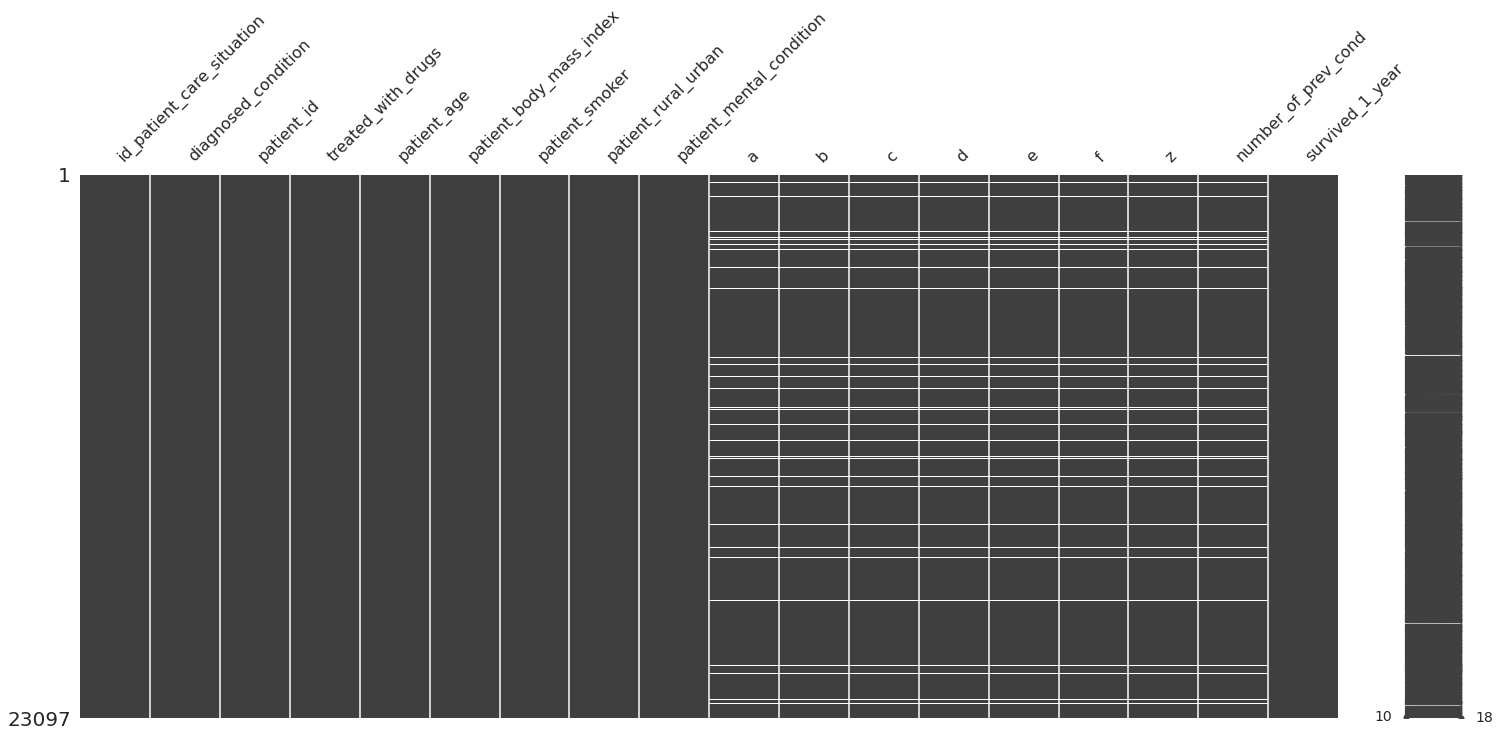

In [ ]:
msno.matrix(df)

1. Most of the missing values are present at the column a,b,c,d,e,f,z, number_prev_cond and treated_with_drugs. 
2. All the columns except the number_prev_cond are categorical, therefore we can use 'mode' in order to fill in the missing values.
3. Based on the msno matrix graph, when the value of the columns a,b,c,d,e,f and z are null, the number_prev_cond is also null. This is because number_prev_cond is the sum of these columns. This column can be dropped later on as it is related with the other columns and may caused collinearity issues.


In [ ]:
missing_col = ['a','b','c','d','e','f','z','treated_with_drugs']

In [ ]:
mean_imputer = SimpleImputer(strategy='most_frequent')
df[missing_col] = mean_imputer.fit_transform(df[missing_col])
df.isnull().sum()

id_patient_care_situation       0
diagnosed_condition             0
patient_id                      0
treated_with_drugs              0
patient_age                     0
patient_body_mass_index         0
patient_smoker                  0
patient_rural_urban             0
patient_mental_condition        0
a                               0
b                               0
c                               0
d                               0
e                               0
f                               0
z                               0
number_of_prev_cond          1235
survived_1_year                 0
dtype: int64

#### Drop the unnecessary columns
> The following columns will be dropped: id_patient_care_situation, patient_id and number_of_prev_cond

In [ ]:
to_drop = ['id_patient_care_situation', 'patient_id','number_of_prev_cond']
df.drop(columns=to_drop, inplace=True)
df.head()

,diagnosed_condition,treated_with_drugs,patient_age,patient_body_mass_index,patient_smoker,patient_rural_urban,patient_mental_condition,a,b,c,d,e,f,z,survived_1_year
0,8,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,5,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,23,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,51,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


#### Remove Outliers

In [ ]:
df[df['patient_smoker']=='Cannot say']

,diagnosed_condition,treated_with_drugs,patient_age,patient_body_mass_index,patient_smoker,patient_rural_urban,patient_mental_condition,a,b,c,d,e,f,z,survived_1_year
4,0,DX6,128,1.3484,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
218,0,DX6,112,1.2925,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2540,0,DX6,149,1.7784,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2711,0,DX6,123,1.9290,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4308,0,DX6,114,1.6239,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4887,0,DX6,132,1.9896,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6308,0,DX6,142,1.5701,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
10388,0,DX6,138,1.3745,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
10663,0,DX6,142,1.1450,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
12782,0,DX6,112,1.5465,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [ ]:
df[df['patient_age']>80]

,diagnosed_condition,treated_with_drugs,patient_age,patient_body_mass_index,patient_smoker,patient_rural_urban,patient_mental_condition,a,b,c,d,e,f,z,survived_1_year
4,0,DX6,128,1.3484,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
218,0,DX6,112,1.2925,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2540,0,DX6,149,1.7784,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2711,0,DX6,123,1.9290,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4308,0,DX6,114,1.6239,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4887,0,DX6,132,1.9896,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6308,0,DX6,142,1.5701,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
10388,0,DX6,138,1.3745,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
10663,0,DX6,142,1.1450,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
12782,0,DX6,112,1.5465,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [ ]:
print(df[df['patient_smoker']=='Cannot say'].index)
print(df[df['patient_age']>80].index)

Int64Index([4, 218, 2540, 2711, 4308, 4887, 6308, 10388, 10663, 12782, 18630,
            19123, 21705],
           dtype='int64')
Int64Index([4, 218, 2540, 2711, 4308, 4887, 6308, 10388, 10663, 12782, 18630,
            19123, 21705],
           dtype='int64')


- Based on the tables above, there are 15 rows having a value of 'cannot say' for patient_smoker column. 
- Surprisingly, these are the same same rows having an age above 100 years old which is greater than the life expectancy in Greenland (71.40 years old). 
- Another issue found is that the body mass index are very low as compared to the lowest BMI ever recorded (7.5)

These rows are considered to be an outliers. We will be dropping these rows as we are not sure which among the fields of these rows have been correctly recorded. 



In [ ]:
df.drop(df[df['patient_smoker']=='Cannot say'].index, inplace=True)
df = df.reset_index()
df.drop(columns='index', inplace=True)
df.head()

,diagnosed_condition,treated_with_drugs,patient_age,patient_body_mass_index,patient_smoker,patient_rural_urban,patient_mental_condition,a,b,c,d,e,f,z,survived_1_year
0,8,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,5,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,23,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,51,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,45,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
print(df[df['patient_age']>80].index)

Int64Index([], dtype='int64')


## Feature Engineering

#### Convert Categorical Value into Numerical Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23084 entries, 0 to 23083
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   diagnosed_condition       23084 non-null  int64  
 1   treated_with_drugs        23084 non-null  object 
 2   patient_age               23084 non-null  int64  
 3   patient_body_mass_index   23084 non-null  float64
 4   patient_smoker            23084 non-null  object 
 5   patient_rural_urban       23084 non-null  object 
 6   patient_mental_condition  23084 non-null  object 
 7   a                         23084 non-null  object 
 8   b                         23084 non-null  object 
 9   c                         23084 non-null  object 
 10  d                         23084 non-null  object 
 11  e                         23084 non-null  object 
 12  f                         23084 non-null  object 
 13  z                         23084 non-null  object 
 14  surviv

In [ ]:
to_convert = ['treated_with_drugs','patient_smoker','patient_rural_urban','patient_mental_condition']
df_new=pd.get_dummies(df, columns=to_convert)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23084 entries, 0 to 23083
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   diagnosed_condition                      23084 non-null  int64  
 1   patient_age                              23084 non-null  int64  
 2   patient_body_mass_index                  23084 non-null  float64
 3   a                                        23084 non-null  object 
 4   b                                        23084 non-null  object 
 5   c                                        23084 non-null  object 
 6   d                                        23084 non-null  object 
 7   e                                        23084 non-null  object 
 8   f                                        23084 non-null  object 
 9   z                                        23084 non-null  object 
 10  survived_1_year                          23084

In [ ]:
df_new.head()

,diagnosed_condition,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,...,treated_with_drugs_DX3 DX5,treated_with_drugs_DX4,treated_with_drugs_DX4 DX5,treated_with_drugs_DX5,treated_with_drugs_DX6,patient_smoker_NO,patient_smoker_YES,patient_rural_urban_RURAL,patient_rural_urban_URBAN,patient_mental_condition_Stable
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,1
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,1
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,1,0,1
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,1
4,45,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,1


In [ ]:
df_new.columns

Index(['diagnosed_condition', 'patient_age', 'patient_body_mass_index', 'a',
       'b', 'c', 'd', 'e', 'f', 'z', 'survived_1_year',
       'treated_with_drugs_DX1 ', 'treated_with_drugs_DX1 DX2 ',
       'treated_with_drugs_DX1 DX2 DX3 ',
       'treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
       'treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'treated_with_drugs_DX1 DX2 DX4 ',
       'treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'treated_with_drugs_DX1 DX2 DX5 ', 'treated_with_drugs_DX1 DX3 ',
       'treated_with_drugs_DX1 DX3 DX4 ',
       'treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'treated_with_drugs_DX1 DX3 DX5 ', 'treated_with_drugs_DX1 DX4 ',
       'treated_with_drugs_DX1 DX4 DX5 ', 'treated_with_drugs_DX1 DX5 ',
       'treated_with_drugs_DX2 ', 'treated_with_drugs_DX2 DX3 ',
       'treated_with_drugs_DX2 DX3 DX4 ',
       'treated_with_drugs_DX2 DX3 DX4 DX5 ',
       'treated_with_drugs_DX2 DX3 DX5 ', 'treated_with_drugs_DX2 DX4 

In [ ]:
df_new.columns = df_new.columns.str.rstrip()
df_new.columns = df_new.columns.str.replace(' ','_')
df_new.columns = df_new.columns.str.lower()
df_new.columns

Index(['diagnosed_condition', 'patient_age', 'patient_body_mass_index', 'a',
       'b', 'c', 'd', 'e', 'f', 'z', 'survived_1_year',
       'treated_with_drugs_dx1', 'treated_with_drugs_dx1_dx2',
       'treated_with_drugs_dx1_dx2_dx3', 'treated_with_drugs_dx1_dx2_dx3_dx4',
       'treated_with_drugs_dx1_dx2_dx3_dx4_dx5',
       'treated_with_drugs_dx1_dx2_dx3_dx5', 'treated_with_drugs_dx1_dx2_dx4',
       'treated_with_drugs_dx1_dx2_dx4_dx5', 'treated_with_drugs_dx1_dx2_dx5',
       'treated_with_drugs_dx1_dx3', 'treated_with_drugs_dx1_dx3_dx4',
       'treated_with_drugs_dx1_dx3_dx4_dx5', 'treated_with_drugs_dx1_dx3_dx5',
       'treated_with_drugs_dx1_dx4', 'treated_with_drugs_dx1_dx4_dx5',
       'treated_with_drugs_dx1_dx5', 'treated_with_drugs_dx2',
       'treated_with_drugs_dx2_dx3', 'treated_with_drugs_dx2_dx3_dx4',
       'treated_with_drugs_dx2_dx3_dx4_dx5', 'treated_with_drugs_dx2_dx3_dx5',
       'treated_with_drugs_dx2_dx4', 'treated_with_drugs_dx2_dx4_dx5',
       'treat

#### Split the data into X and Y

In [ ]:
X = df_new.drop(columns = 'survived_1_year')
y = df_new['survived_1_year']

In [ ]:
print("Independent Variable data size:", X.shape)
print("Dependent Variable data size:", y.shape)

Independent Variable data size: (23084, 47)
Dependent Variable data size: (23084,)


#### Normalize X variables

In [ ]:
# Normalize X variables
norm = MinMaxScaler().fit(X)
X_norm = pd.DataFrame(norm.transform(X))
X_norm.columns=X.columns
print("Normalized X data size:", X_norm.shape)

Normalized X data size: (23084, 47)


In [ ]:
X_norm.head()

,diagnosed_condition,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,...,treated_with_drugs_dx3_dx5,treated_with_drugs_dx4,treated_with_drugs_dx4_dx5,treated_with_drugs_dx5,treated_with_drugs_dx6,patient_smoker_no,patient_smoker_yes,patient_rural_urban_rural,patient_rural_urban_urban,patient_mental_condition_stable
0,0.137255,0.848485,0.113780,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.078431,0.545455,0.457352,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.431373,0.727273,0.808485,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.980392,0.075758,0.163905,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.862745,0.712121,0.704255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


#### Split the data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (16158, 47)
Shape of testing feature: (6926, 47)
Shape of training label: (16158,)
Shape of training label: (6926,)


**Correct Imbalanced Target Variable**

Class=1, n=10219 (63.244%)
Class=0, n=5939 (36.756%)


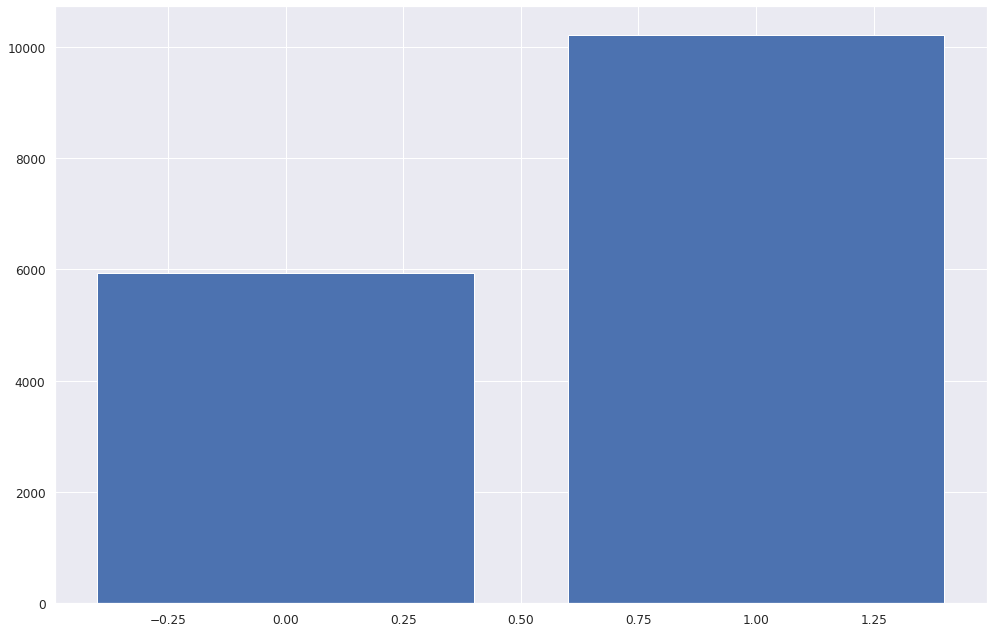

In [ ]:
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train,y_train)

Class=1, n=10219 (50.000%)
Class=0, n=10219 (50.000%)


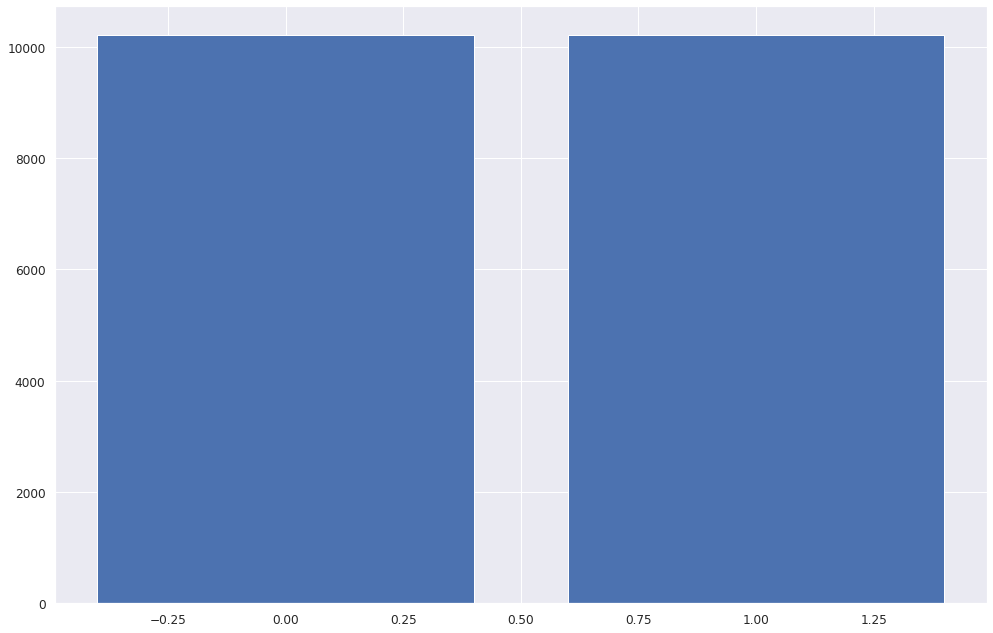

In [ ]:
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## Model Development

#### Baseline Model

We will going to select which algorithm to be used as our baseline model

In [ ]:
# Decision Tree model 
dt = DecisionTreeClassifier(random_state=0)
# Extra Trees Classifier model
ex = ExtraTreesClassifier()
# Random Forest model
rf = RandomForestClassifier(n_estimators=200)
# Naive Bayes model 
nb = GaussianNB()
# XGboost Classifier model 
xgb = XGBClassifier()

model = {'DecisionTree':dt, 'ExtraTree':ex, 'RandomForest': rf, 'NaiveBayes': nb, 'XGboost':xgb}

In [ ]:
def fit_model(model, X_train, y_train):
    model.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy score:',accuracy_score(y_test, y_pred))
    print('F1_score:',f1_score(y_test ,y_pred))
    cm = metrics.confusion_matrix(y_test, y_pred)
    report = metrics.classification_report(y_test, y_pred, digits=3)
    return {'cm':cm, 'report':report}

def print_results(model, X_train, X_test, y_train, y_test):
  for model_key, model_values in model.items():
    print('------------')
    print('Model: ',model_key)
    fit_model(model_values,X_train,y_train)
    mod = evaluate_model(model_values, X_test, y_test)

    print('Confusion Matrix:\n', mod['cm'])
    print('Report:\n', mod['report'])

In [ ]:
print('### BASELINE MODEL ###')
print_results(model, X_train, X_test, y_train, y_test)

### BASELINE MODEL ###
------------
Model:  DecisionTree
Accuracy score: 0.7685532775050534
F1_score: 0.8133659331703341
Confusion Matrix:
 [[1830  725]
 [ 878 3493]]
Report:
               precision    recall  f1-score   support

           0      0.676     0.716     0.695      2555
           1      0.828     0.799     0.813      4371

    accuracy                          0.769      6926
   macro avg      0.752     0.758     0.754      6926
weighted avg      0.772     0.769     0.770      6926

------------
Model:  ExtraTree
Accuracy score: 0.7845798440658389
F1_score: 0.8301457194899818
Confusion Matrix:
 [[1788  767]
 [ 725 3646]]
Report:
               precision    recall  f1-score   support

           0      0.712     0.700     0.706      2555
           1      0.826     0.834     0.830      4371

    accuracy                          0.785      6926
   macro avg      0.769     0.767     0.768      6926
weighted avg      0.784     0.785     0.784      6926

------------
Model: 

As shown in the above result:
- XGBoost and Random Forest model has the best F1-score and accuracy
- Among the two models, Random Forest has higher F1_score as compared to XGBoost 
- XGboost has a lower False Negative or Type 2 error count (413) as compared to Random Forest.
- XGboost has higher accuracy as compared to Random Forest.
- XGboost has higher f1_score for class 0 of the survived_1_year column as compared to the f1 score of Random Forest

Due to the observations above, we will be using XGBoost as our baseline model.

#### Feature Selection

In [ ]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= xgb, step = 1)
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 23
Selected Features: [ True  True  True  True  True  True  True  True False False  True  True
 False False False False False False False  True False False False False
 False  True  True False False False  True False False  True  True  True
 False  True  True False  True  True  True False  True False False]
Feature Ranking: [ 1  1  1  1  1  1  1  1 20  5  1  1  7  9 11 13 15 17 21  1  4 22  2 25
 19  1  1  8 10 12  1 14 16  1  1  1 18  1  1  3  1  1  1  6  1 23 24]


In [ ]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,diagnosed_condition,1
42,patient_smoker_no,1
41,treated_with_drugs_dx6,1
40,treated_with_drugs_dx5,1
38,treated_with_drugs_dx4,1
37,treated_with_drugs_dx3_dx5,1
35,treated_with_drugs_dx3_dx4,1
34,treated_with_drugs_dx3,1
33,treated_with_drugs_dx2_dx5,1
30,treated_with_drugs_dx2_dx3_dx5,1


In [ ]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

xgb_rfe = xgb.fit(X_train_rfe, y_train)
y_pred_rfe = xgb_rfe.predict(X_test_rfe)
rfe_accuracy = accuracy_score(y_test, y_pred_rfe)
rfe_fscore = f1_score(y_test ,y_pred_rfe)

print("XGBClassifier with RFE Selection Accuracy:", rfe_accuracy)
print("XGBClassifier with RFE Selection F1 Score:", rfe_fscore)

XGBClassifier with RFE Selection Accuracy: 0.8150447588795842
XGBClassifier with RFE Selection F1 Score: 0.8450840488571775


Model performance got improved after performing Feature Selection Method

#### Hyperparameter Tuning

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=5)

In [ ]:
parameters = {
    'max_depth': [2, 6, 8, 10],
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(estimator=xgb_rfe, param_grid=parameters, scoring = 'f1',cv = cv, verbose=True)
grid_result = grid_search.fit(X_train_rfe, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best: 0.851709 using {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 700}


In [ ]:
xgb = XGBClassifier()
tuned_xgb = XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=700)

model = {'Baseline model': xgb, 'Tuned model': tuned_xgb}
print('### Without RFE ###')
print_results(model, X_train, X_test, y_train, y_test)
print('### With RFE ###')
print_results(model, X_train_rfe, X_test_rfe, y_train, y_test)

### Without RFE ###
------------
Model:  Baseline model
Accuracy score: 0.8151891423621138
F1_score: 0.8455598455598455
Confusion Matrix:
 [[2142  413]
 [ 867 3504]]
Report:
               precision    recall  f1-score   support

           0      0.712     0.838     0.770      2555
           1      0.895     0.802     0.846      4371

    accuracy                          0.815      6926
   macro avg      0.803     0.820     0.808      6926
weighted avg      0.827     0.815     0.818      6926

------------
Model:  Tuned model
Accuracy score: 0.8257291365867745
F1_score: 0.8621988811508162
Confusion Matrix:
 [[1943  612]
 [ 595 3776]]
Report:
               precision    recall  f1-score   support

           0      0.766     0.760     0.763      2555
           1      0.861     0.864     0.862      4371

    accuracy                          0.826      6926
   macro avg      0.813     0.812     0.813      6926
weighted avg      0.825     0.826     0.826      6926

### With RFE ###
--

- Based on the results above, Tuned Model without RFE has the best F1 score and accuracy. This model will serve as our final model.

In [ ]:
final_model = XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=700).fit(X_train, y_train)

## Model Evaluation

**Test on the unseen data**

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [ ]:
test_df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

All the preprocessing that was done during the training phase will also be done with the unseen data

In [ ]:
test_df.columns= test_df.columns.str.lower()

In [ ]:
test_df.isnull().sum()

id_patient_care_situation    0
diagnosed_condition          0
patient_id                   0
treated_with_drugs           0
patient_age                  0
patient_body_mass_index      0
patient_smoker               0
patient_rural_urban          0
patient_mental_condition     0
a                            0
b                            0
c                            0
d                            0
e                            0
f                            0
z                            0
number_of_prev_cond          0
dtype: int64

In [ ]:
to_drop = ['id_patient_care_situation', 'patient_id','number_of_prev_cond']
test_df.drop(columns=to_drop, inplace=True)

In [ ]:
test_df[test_df['patient_smoker']=='Cannot say']

,diagnosed_condition,treated_with_drugs,patient_age,patient_body_mass_index,patient_smoker,patient_rural_urban,patient_mental_condition,a,b,c,d,e,f,z


In [ ]:
to_convert = ['treated_with_drugs','patient_smoker','patient_rural_urban','patient_mental_condition']
test_df_new=pd.get_dummies(test_df, columns=to_convert)

In [ ]:
test_df_new.columns = test_df_new.columns.str.rstrip()
test_df_new.columns = test_df_new.columns.str.replace(' ','_')
test_df_new.columns = test_df_new.columns.str.lower()

In [ ]:
test_df_new.head()

,diagnosed_condition,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,...,treated_with_drugs_dx3_dx5,treated_with_drugs_dx4,treated_with_drugs_dx4_dx5,treated_with_drugs_dx5,treated_with_drugs_dx6,patient_smoker_no,patient_smoker_yes,patient_rural_urban_rural,patient_rural_urban_urban,patient_mental_condition_stable
0,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
1,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,1,1
2,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,1
3,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,1,0,0,1,1
4,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
norm = MinMaxScaler().fit(test_df_new)
test_df_new_norm = pd.DataFrame(norm.transform(test_df_new))
test_df_new_norm.columns=test_df_new.columns
print("Normalized X data size:", test_df_new_norm.shape)

Normalized X data size: (9303, 47)


In [ ]:
test_df_new_norm.columns

Index(['diagnosed_condition', 'patient_age', 'patient_body_mass_index', 'a',
       'b', 'c', 'd', 'e', 'f', 'z', 'treated_with_drugs_dx1',
       'treated_with_drugs_dx1_dx2', 'treated_with_drugs_dx1_dx2_dx3',
       'treated_with_drugs_dx1_dx2_dx3_dx4',
       'treated_with_drugs_dx1_dx2_dx3_dx4_dx5',
       'treated_with_drugs_dx1_dx2_dx3_dx5', 'treated_with_drugs_dx1_dx2_dx4',
       'treated_with_drugs_dx1_dx2_dx4_dx5', 'treated_with_drugs_dx1_dx2_dx5',
       'treated_with_drugs_dx1_dx3', 'treated_with_drugs_dx1_dx3_dx4',
       'treated_with_drugs_dx1_dx3_dx4_dx5', 'treated_with_drugs_dx1_dx3_dx5',
       'treated_with_drugs_dx1_dx4', 'treated_with_drugs_dx1_dx4_dx5',
       'treated_with_drugs_dx1_dx5', 'treated_with_drugs_dx2',
       'treated_with_drugs_dx2_dx3', 'treated_with_drugs_dx2_dx3_dx4',
       'treated_with_drugs_dx2_dx3_dx4_dx5', 'treated_with_drugs_dx2_dx3_dx5',
       'treated_with_drugs_dx2_dx4', 'treated_with_drugs_dx2_dx4_dx5',
       'treated_with_drugs_dx2_d

In [ ]:
df_new.columns

Index(['diagnosed_condition', 'patient_age', 'patient_body_mass_index', 'a',
       'b', 'c', 'd', 'e', 'f', 'z', 'survived_1_year',
       'treated_with_drugs_dx1', 'treated_with_drugs_dx1_dx2',
       'treated_with_drugs_dx1_dx2_dx3', 'treated_with_drugs_dx1_dx2_dx3_dx4',
       'treated_with_drugs_dx1_dx2_dx3_dx4_dx5',
       'treated_with_drugs_dx1_dx2_dx3_dx5', 'treated_with_drugs_dx1_dx2_dx4',
       'treated_with_drugs_dx1_dx2_dx4_dx5', 'treated_with_drugs_dx1_dx2_dx5',
       'treated_with_drugs_dx1_dx3', 'treated_with_drugs_dx1_dx3_dx4',
       'treated_with_drugs_dx1_dx3_dx4_dx5', 'treated_with_drugs_dx1_dx3_dx5',
       'treated_with_drugs_dx1_dx4', 'treated_with_drugs_dx1_dx4_dx5',
       'treated_with_drugs_dx1_dx5', 'treated_with_drugs_dx2',
       'treated_with_drugs_dx2_dx3', 'treated_with_drugs_dx2_dx3_dx4',
       'treated_with_drugs_dx2_dx3_dx4_dx5', 'treated_with_drugs_dx2_dx3_dx5',
       'treated_with_drugs_dx2_dx4', 'treated_with_drugs_dx2_dx4_dx5',
       'treat

**Prediction**

In [ ]:
test_pred = final_model.predict(test_df_new_norm)

In [ ]:
output = pd.DataFrame({'prediction': test_pred})
output.to_csv('Submission.csv', index=False)